In [1]:
from __future__ import absolute_import, division, print_function# need to undestend their utility <-------- UNKNOWN
import tensorflow as tf
import keras# dont import keras ftom tensorflow library otherwise the code below will fail
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt# this library will be used for data visualization
#print(dir(mnist))# i use this command to see all the methods of this class
#help(mnist)# return the documentation of the dataset

TestSize = 0.2# size of the test set

percent = 0.2# percentage of data we want to give to our system from all the data aveilable
# we start to take them from the start of the dataset , one after one)

LukyNumber = 4# the number that in this session will be associated to 1 while the others will be set to 0
# (we set all the other numbers to zero becouse otherwise the neural network behave incorrectly with thos libraries)

2022-05-05 02:08:31.965737: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-05 02:08:31.965774: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# import the dataset "mnist" that contains all the images of the numbers
# and relatives lables an then assine all those data to two sets ( training set and test set )

In [3]:
# I want to see some information about my data and they format
print(type(x_train))# return the typology of our data set of images
print(len(x_train))# retunr the lenth of the data set ( how much images we have )
print(np.shape(x_train))# return the shape of the data set, in our case we have the
# lenth and then the dimensions of the images

print(type(x_test))# return the typology of our training set of images
print(len(x_test))# retunr the lenth of the training set ( how much images we have )
print(np.shape(x_test))# return the shape of the training set, in our case we have the
# lenth and then the dimensions of the images

#print(dir(np))
#print(help(np.concatenate))

<class 'numpy.ndarray'>
60000
(60000, 28, 28)
<class 'numpy.ndarray'>
10000
(10000, 28, 28)


In [4]:
'''                             I HAVE TO CHECK IF THIS PART OF THE CODE IS CORRECT                            '''

#                                    Reduction of the dataset dimension

x_total_temp = np.append(x_train, x_test, axis=0)# CHECK IF THE PARTS ARE APPENDED CORRECTLY <------------- WARNING
print("Shape of x_total_temp: {0}".format(np.shape(x_total_temp)))

x_total = x_total_temp[0: int(np.shape(x_total_temp)[0]*percent)]
print("Shape of x_total reduced to {1}: {0}".format(np.shape(x_total), percent))

y_total_temp = np.append(y_train, y_test, axis=0)# CHECK IF THE PARTS ARE APPENDED CORRECTLY <------------- WARNING
print("Shape of y_total_temp: {0}".format(np.shape(y_total_temp)))

y_total = y_total_temp[0: int(np.shape(y_total_temp)[0]*percent)]
print("Shape of y_total reduced to {1}: {0}".format(np.shape(y_total), percent))

Shape of x_total_temp: (70000, 28, 28)
Shape of x_total reduced to 0.2: (14000, 28, 28)
Shape of y_total_temp: (70000,)
Shape of y_total reduced to 0.2: (14000,)


In [5]:
"""                                       THE ERROR COULD BE HERE                                                """
# Redistribution of the data in two sets ( test and train)
x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=TestSize)

In [6]:
"""                                       THE ERROR COULD BE HERE                                                """
#                                     Assignment of values [1, -1]

# REWRITE THE CODE BECAUSE IT ISNT EFFISCENT ENOUGH (nested for loops or something else)

for i in range(0, np.shape(y_train)[0]):# <-------------------------------------------------- WARNING (use iterator)
    if y_train[i] == LukyNumber:
        pass
    else:
        y_train[i] = 0
        
for i in range(0, np.shape(y_test)[0]):# <-------------------------------------------------- WARNING (use iterator)
    if y_test[i] == LukyNumber:
        pass
    else:
        y_test[i] = 0

In [7]:
# TEST TO SEE WHAT IS HAPPENING 
print(len(y_train))
print(np.shape(y_train))
print(y_train)

11200
(11200,)
[0 0 0 ... 0 0 0]


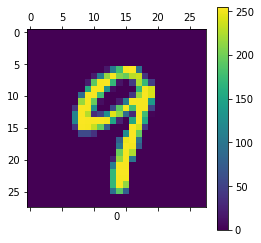

In [8]:
plt.matshow(x_train[99])# i wanted to see the 100 image 
plt.colorbar()# i want to have the gradueted bar with colors
plt.grid(False)# i dont want to have a grid on the image
plt.xlabel(y_train[99])# write the number on the photo on x axis
plt.show()# show the image

In [9]:
x_train = x_train/255# used for scaling of the numbers rappresenting the color of the image
# its a good practice becouse otherwise we will operete with very large numbers and this will
# give us problems ( overflow )

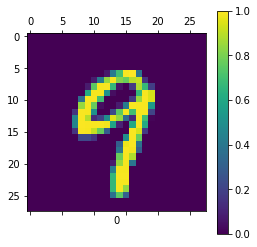

In [10]:
# same thing as above ( just to see if the conversion were done correctly )
plt.matshow(x_train[99])
plt.colorbar()
plt.grid(False)
plt.xlabel(y_train[99])
plt.show()

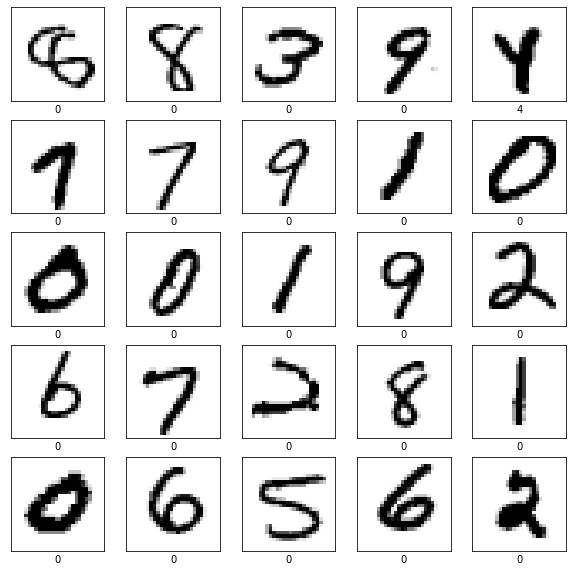

In [11]:
# display the first 25 training images with labels and verify that the data is in the correct formate.
plt.figure(figsize=(10,10))# <--------------------------------------------------------------------------- UNKNOWN
for i in range(25):# i want to plot 25 images
    plt.subplot(5,5,i+1)# the letter "i" rappresent the position 
    plt.xticks([])# <------------------------------------------------------------------------------------ UNKNOWN
    plt.yticks([])
    plt.grid(False)# in this way i will not have the grid in on the images
    plt.imshow(x_train[i], cmap=plt.cm.binary)# load the image and make it show black and white
    plt.xlabel(y_train[i])# add the lable associated to that image under it
plt.show()# show all the images

In [12]:
# Creation of the structure of neural network
# (i dont know which activation function is the best for this problem same for the inner and last layer dimensions)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # this layer will convert two dimetional (2d) array (image of 28x28 pixels) in to a one dimentional array of 28*28 = 784pixels.
    keras.layers.Dense(40, activation=tf.nn.relu),# second layer has 128 neurons, with relu as activation function
    keras.layers.Dense(10, activation=tf.nn.softmax)# last layer has 10 neurons, with softmax as activation function
])

2022-05-05 02:08:38.199151: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-05 02:08:38.199188: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-05 02:08:38.199212: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (roman-VirtualBox): /proc/driver/nvidia/version does not exist


In [13]:
# Configuration of neural network 
model.compile(optimizer='adam',# we have seen it duering the lessosn
             loss='sparse_categorical_crossentropy',# <---------------------------------------------------- UNKNOWN
             metrics=['accuracy'])# <---------------------------------------------------------------------- UNKNOWN

In [14]:
# training of the model 
model.fit(x_train, y_train, epochs=1)# we do the training for only one epoch

350/350 [==============================] - 2s 4ms/step - loss: 0.1559 - accuracy: 0.9579


In [15]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)# test the model on our test set
print('test accuracy:{0}\ntest loss:{1}'.format(test_acc, test_loss))

88/88 [==============================] - 1s 3ms/step - loss: 7.1508 - accuracy: 0.9836
test accuracy:0.9835714101791382
test loss:7.150753498077393


1/1 [==============================] - 0s 105ms/step


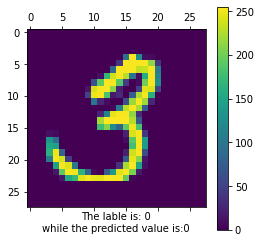

In [16]:
# Prediction for single images

# we know that y_test[kk] image is something, we want to see if our neural networck predict it correctly
kk = 9# image number in the training set thet we want to check
img = x_test[kk]
# print(img.shape)  # shape (28, 28)

# tf.keras model are optimized to make predictions for batch or collection of test data at once. So we need to add it to a list:
img_list = np.expand_dims(img,0)
# print(img_list)   # shape (1, 28, 28)

predictions_single = model.predict(img_list)# performe the prediction

plt.matshow(x_test[kk])
plt.colorbar()
plt.grid(False)
plt.xlabel("The lable is: {0}\nwhile the predicted value is:{1}".format(y_test[kk], np.argmax(predictions_single)))
plt.show()

In [17]:
"""                                  NOT RELLEVANT PART FOR OUR EXPERIMENT
#Usually the accuracy in the training set is greater than in the test set, this phenomenon is called overfitting.

# Make Predictions
predictions = model.predict(x_train)

predictions[0]              # this will print an array of 10 value that show the confidence of the model

np.argmax(predictions[0])   # this will print the label having the highest confidence value.
"""

'                                  NOT RELLEVANT PART FOR OUR EXPERIMENT\n#Usually the accuracy in the training set is greater than in the test set, this phenomenon is called overfitting.\n\n# Make Predictions\npredictions = model.predict(x_train)\n\npredictions[0]              # this will print an array of 10 value that show the confidence of the model\n\nnp.argmax(predictions[0])   # this will print the label having the highest confidence value.\n'